# Get Information From Pcap

In [ ]:
from scapy.all import *
from datetime import datetime
import zstandard as zstd
import dpkt
import socket
import sys
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

PCAP_FILE = "/data/darknet/2016/2016-09-17.pcap.zst"
TH_SYN = 0x02
TH_ACK = 0x10
OUTFILE = "t-outfile.csv"

# Clustering and Grouping

In [1]:
#Kmeans-test2.python
#1000行のデータをKmeansで分類し、
#分類されたグループの特徴を Pairplotで可視化、Graphical-Lassoで関係性を求める
#Version1: 2022.06.29
#################################
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
################################

#データを読み込んで、形式を変換する
#data = pd.read_csv("./sample-test/result.csv")
data = pd.read_csv("result.csv")
data_array = np.array([data['IPID'].tolist(),
                       data['TTL'].tolist(),
                       data['SRCIP'].tolist(),
                       data['DSTIP'].tolist(),
                       data['SPORT'].tolist(),
                       data['TSEQ'].tolist(),
                       data['WINDS'].tolist()
                      ], np.int32)


In [2]:
#行列を転置
data_array_norm = sc.transform(data_array)
data_array = data_array.T

pred = KMeans(n_clusters=3).fit_predict(data_array)
data['cluster_id']=pred
data['cluster_id'].value_counts()


#それぞれのグループのデータを取得
group0 = data[data['cluster_id']==0]
group1 = data[data['cluster_id']==1]
group2 = data[data['cluster_id']==2]

#ラベルの列を削除する　
del group0['cluster_id']
del group1['cluster_id']
del group2['cluster_id']

#ファイルに書き込む
group0.to_csv(r"./sample-test/group1.csv", index=False)
group1.to_csv(r"./sample-test/group2.csv", index=False)
group2.to_csv(r"./sample-test/group3.csv", index=False)

NameError: name 'sc' is not defined

In [ ]:
#Testing 2
data_array_norm = sc.transform(data_array)
data_array = data_array.T

sc = preprocessing.StandardScaler()
sc.fit(data_array)
data_array_norm = sc.transform(data_array)
data_array = data_array.T

cls = KMeans(n_clusters = 5,      #クラスタの個数
                    init = 'k-means++',  #k平均++法によりクラスタ中心を選択
                    n_init= 10,           #異なるセントロイドの初期値を用いたk平均法アルゴリズム実行回数
                    max_iter=350,        #k平均法アルゴリズム内部の最大イテレーション(サイクル繰り返し)回数
                    #tol=1e-04,           #収束と判定できる相対的許容誤差
                    #random_state = 42    #セントロイド初期化に際して、用いる乱数生成器の設定
                   )

result = cls.fit(data_array)
plt.scatter(data_array_norm[:,0], data_array_norm[:, 1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0],result.cluster_centers_[:,1],s=20, marker='*',c='red')
plt.show()

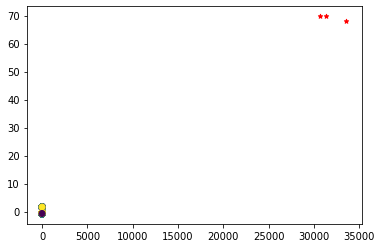

In [6]:
#Kmeansを可視化
sc = preprocessing.StandardScaler()
sc.fit(data_array)
data_array_norm = sc.transform(data_array)

cls = KMeans(n_clusters=3)
result = cls.fit(data_array)

plt.scatter(data_array_norm[:,0], data_array_norm[:, 1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0],result.cluster_centers_[:,1],s=20, marker='*',c='red')
plt.show()

<Figure size 576x360 with 0 Axes>

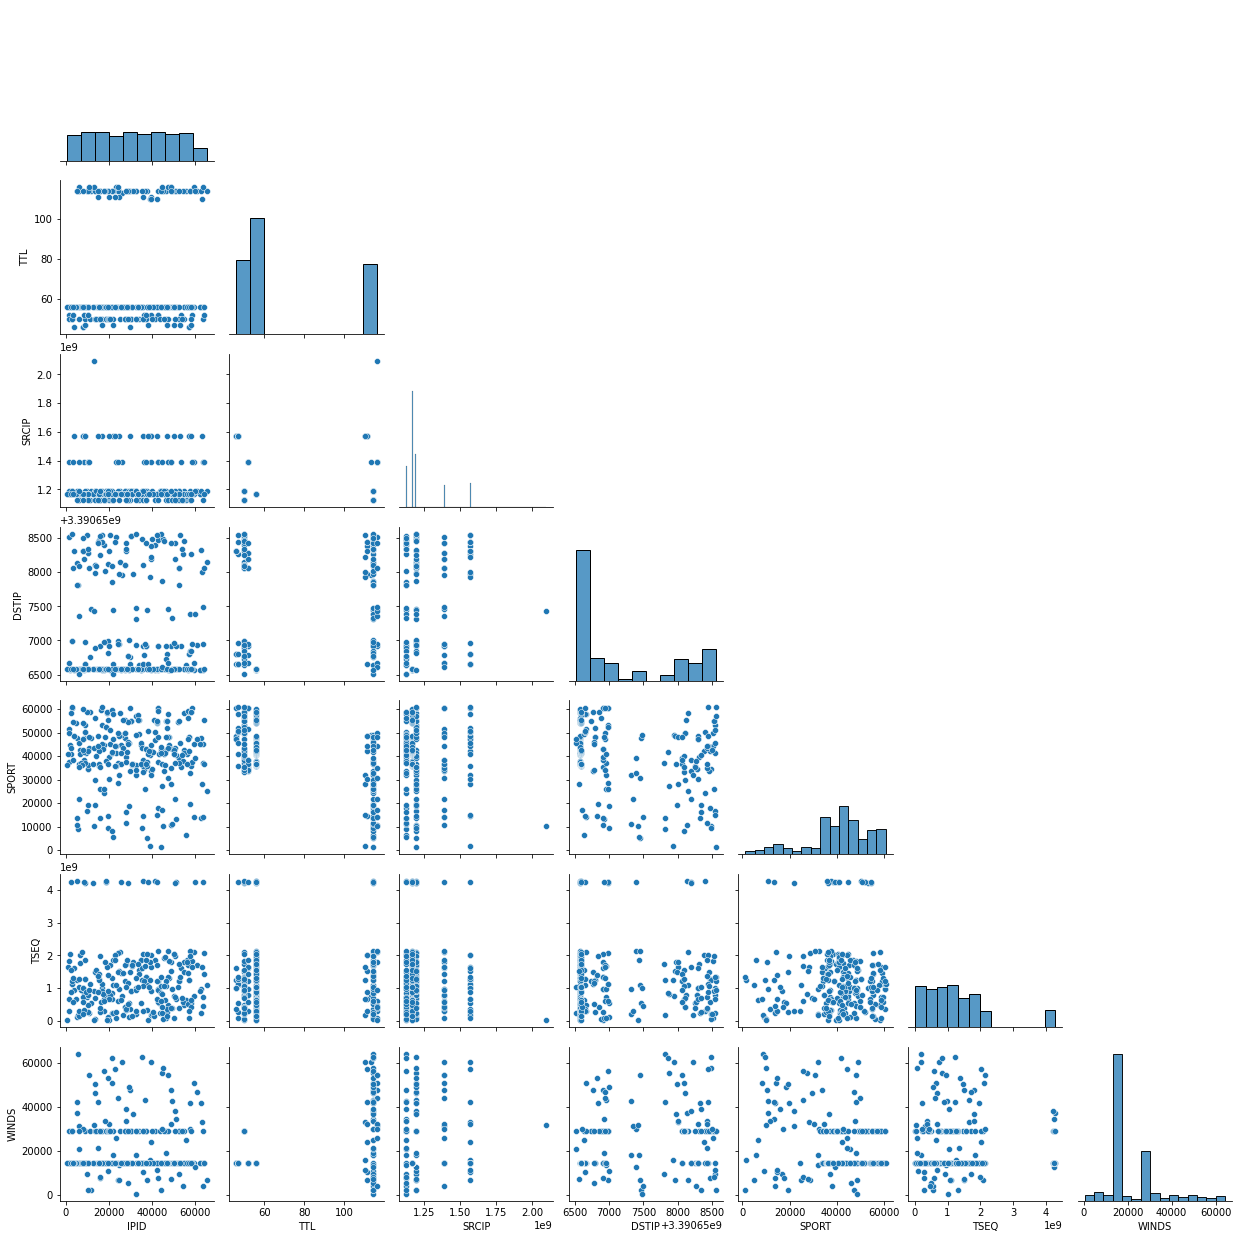

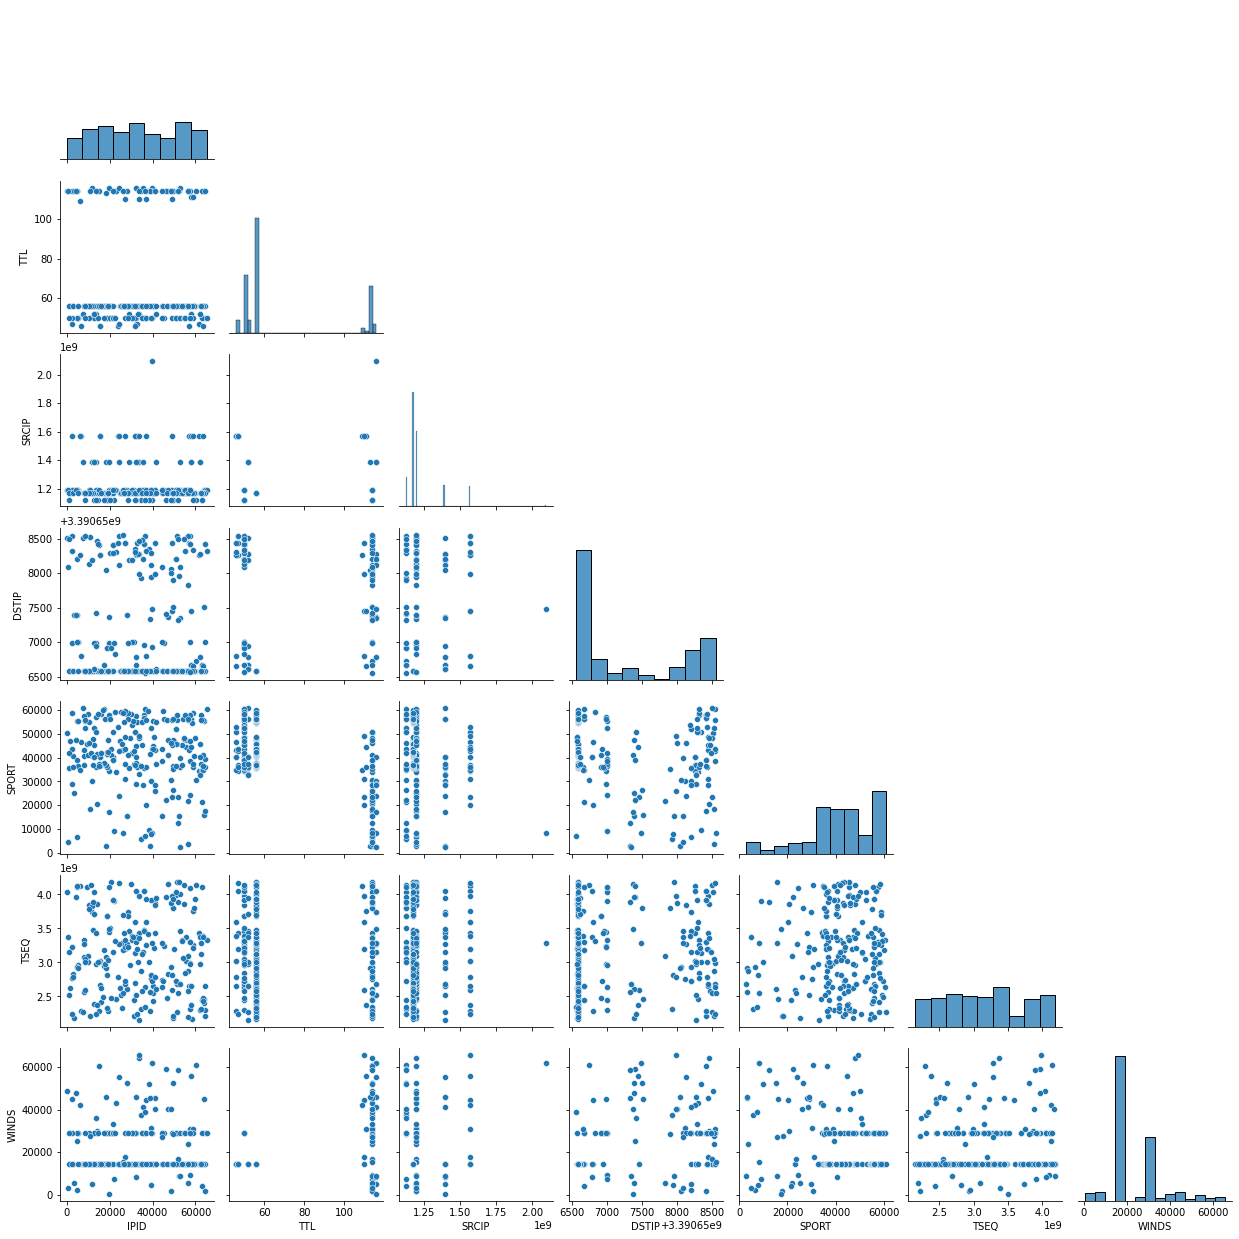

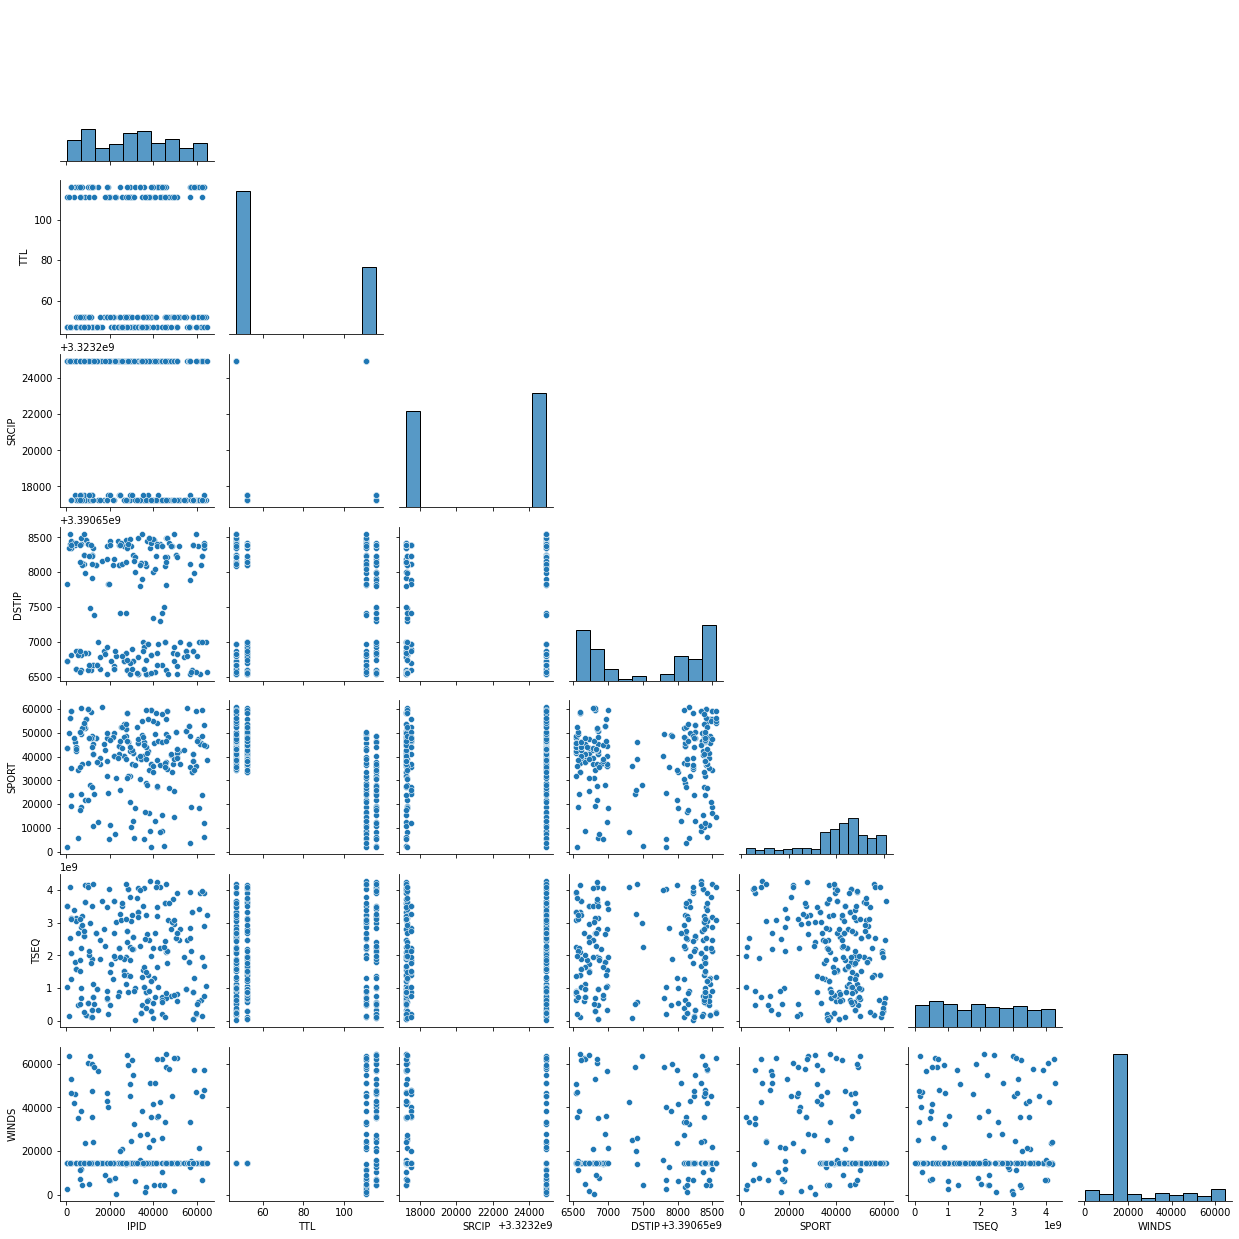

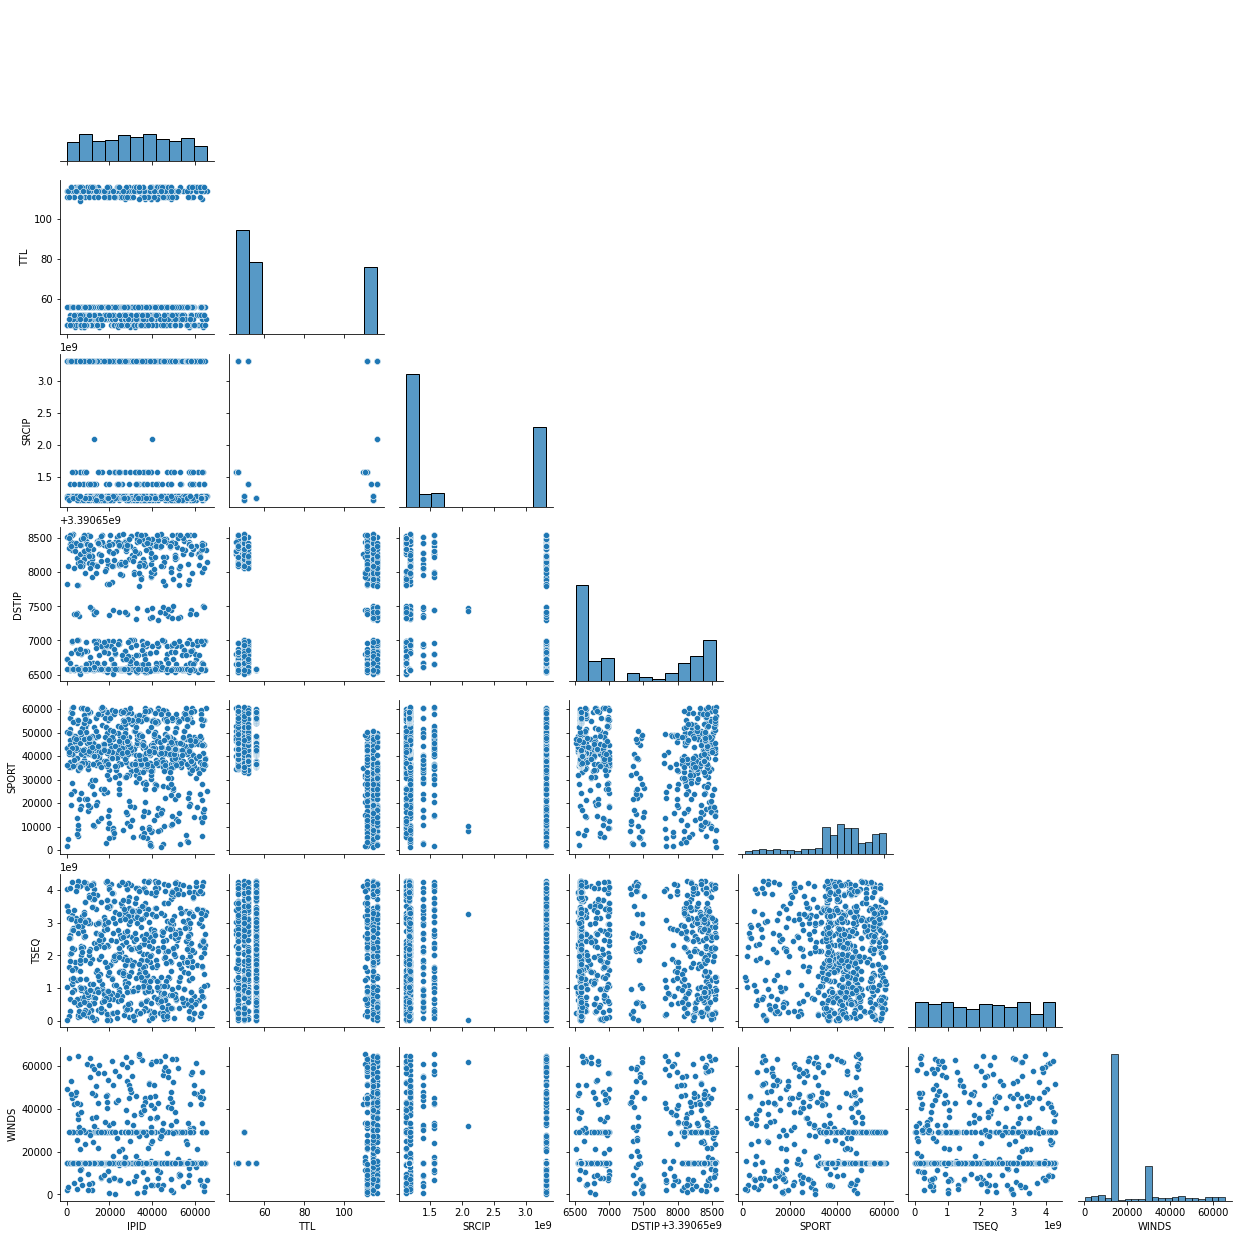

In [10]:
#特徴フィルードを指定する
group0 = group0.loc[:, ["IPID", "TTL","SRCIP", "DSTIP", "SPORT", "TSEQ", "WINDS"]]
group1 = group1.loc[:, ["IPID", "TTL","SRCIP", "DSTIP", "SPORT", "TSEQ", "WINDS"]]
group2 = group2.loc[:, ["IPID", "TTL","SRCIP", "DSTIP", "SPORT", "TSEQ", "WINDS"]]
data2 = data.loc[:, ["IPID", "TTL","SRCIP", "DSTIP", "SPORT", "TSEQ", "WINDS"]]
#a4_dims= (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
#可視化する
plt.figure(figsize=(8,5))
sns.pairplot(data = group0, corner=True)
sns.pairplot(data = group1, corner=True)
sns.pairplot(data = group2, corner=True)
sns.pairplot(data = data2, corner=True)

# Pairplot data from CSV file

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#データを読み込んで、形式を変換する
data = pd.read_csv("group1.csv")
type(data)

pandas.core.frame.DataFrame

In [ ]:
data = pd.DataFrame(data=data)
data2 = data.loc[:, ["IPID", "TTL","SRCIP", "DSTIP", "SPORT", "TSEQ", "WINDS"]]
print(data2)
#plt.figure(figsize=(8,5))
sns.pairplot(data2, corner=True).savefig("pairplot-test.png")

      IPID  TTL       SRCIP       DSTIP  SPORT        TSEQ  WINDS
0    60882   49  3695562921  3390658258   4611  3390658258     19
1    44451   49  3695562921  3390658258  49688  2497634411   5840
2    59697   50   245518856  3390657313  42874  3837134747  14600
3    55642   49  2978787890  3390656775  62768  3390656775  59168
4    60882   49  3695562921  3390658258   4611  3390658258     19
..     ...  ...         ...         ...    ...         ...    ...
453  46219   49  3140019222  3390656534  13365  3390656534  20829
454  50690   49  3695562921  3390658258  57993  2987237347   5840
455  50441   41  2960817803  3390656875  52912  3390656875  15192
456  30260   48  2969714562  3390656539   3548  3792237796   5808
457  49819   54  3087435093  3390656670  63716  3390656670  40332

[458 rows x 7 columns]


# Graphical Lasso

In [5]:
import sys
import csv
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.covariance import GraphicalLassoCV
import igraph as ig

In [9]:
def main(filename):
	#データを読み込む
	fp = open(filename)
	dat1 = list(csv.reader(fp))

	#最初の行をとる
	feature_names = dat1[0]
	dat1 = dat1[1:]
	dat2 = [list(map(int, row)) for row in dat1]
	X = ltonpa(dat2)
    
	#正規化
	X = sp.stats.zscore(X, axis=0)
    
	model = GraphicalLassoCV(alphas=4, cv=2, verbose=True)
	#model = GraphicalLassoCV(alphas=, verbose=True)
	model.fit(X)
	cov_ = model.covariance_
	prec_ = model.precision_

	##グラフデータ生成と表示
	graph_data = glasso_graph_make(model, feature_names, threshold=0.6)
	#graph_data

In [10]:
#グラフ生成関数
def glasso_graph_make(model, feature_names, threshold):
	#分散共分散行列を取得 (Get varience-covarience matrix)
	covariance_matrix = model.covariance_

	#分散共分散行列を相関行列に変換
	diagonal = np.sqrt(covariance_matrix.diagonal())
	correlation_matrix = ((covariance_matrix.T / diagonal).T) / diagonal

	#グラフ表示のために体格成分が0の行列を生成する。
	correlation_matrix_diag_zero = correlation_matrix - np.diag(np.diag(correlation_matrix))
	df_graph_data = pd.DataFrame(index=feature_names, columns=feature_names, data=correlation_matrix_diag_zero.tolist())

	#グラフ生成準備
	graph_data = ig.Graph()
	graph_data.add_vertices(len(feature_names))
	graph_data.vs["feature_names"] = feature_names
	graph_data.vs["label"] = graph_data.vs["feature_names"]
	visual_style = {}
	edge_width_list = []
	edge_color_list = []

	#グラフ生成
	for target_index in range(len(df_graph_data.index)):
		for target_column in range(len(df_graph_data.columns)):
			if target_column >= target_index:
				graph_data_abs_element = df_graph_data.iloc[target_index, target_column]
				if abs(graph_data_abs_element) >= threshold:
					edge = [(target_index, target_column)]
					graph_data.add_edges(edge)
					edge_width_list.append(abs(graph_data_abs_element)*10)
					if graph_data_abs_element > 0:
						edge_color_list.append("red")
					else:
						edge_color_list.append("blue")
	
	visual_style["edge_width"] = edge_width_list
	visual_style["edge_color"] = edge_color_list
	draw_graph = ig.plot(graph_data, **visual_style, vertex_size=50, bbox=(500,500), vertex_color="skyblue", layout="circle", margin=50)
	draw_graph
	return draw_graph

In [11]:
#List to "numpy.array"
def ltonpa(dat1):
	npa = np.array(dat1)
	return npa

In [13]:
main("./group1.csv")

[GraphicalLassoCV] Done refinement  1 out of 4:   0s
[GraphicalLassoCV] Done refinement  2 out of 4:   0s
[GraphicalLassoCV] Done refinement  3 out of 4:   0s
[GraphicalLassoCV] Done refinement  4 out of 4:   0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
